In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

CLASSES_MARKERS = { 0: 's', 1: '^', 2: 'o',3: 'v' }


In [91]:
def get_feature_matrix(masstime, data, significant=True):
    if not significant:
        return data.iloc[3:,8:].to_numpy(dtype=float).T
    inds=[]
    for i in range(3,data.shape[0]):
        mt=data.iloc[i,4] + '@' + data.iloc[i,5]
        if mt in masstime:
            inds.append(i)
    inds=np.asarray(inds, dtype=int)
    return data.iloc[inds,8:].to_numpy(dtype=float).T

def get_ids(data):
    ID=[]
    for line in data.iloc[2,8:]:
        ID.append(line.split('_')[-1].split('.')[0])
    return np.array(ID)

def add_noise(x, magnitude):
    return x + np.random.normal(0,magnitude, x.shape)

In [9]:
path_s = "../../PDproj/cellresults/ttest/ALPHA0.05FC1.0MINVAR0.125/"
filenames_s = [line.split('\n')[0] for line in open(path_s + "filenames.txt")]
filenames_s

['cellshilicneg_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'cellshilicpos_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'cellslipidomicsneg_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'cellslipidomicspos_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'cellsRPneg_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'cellsRPpos_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'mediumHILICneg_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'mediumHILICpos_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'mediumRPneg_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'mediumRPpos_log2.csvALPHA0.05FC1.0MINVAR0.125.csv']

In [10]:
path = "../../PDproj/celldata/clean/"
filenames = [line.split('\n')[0] for line in open(path + "filenames.txt")]
filenames

['cellshilicneg_log2.csv',
 'cellshilicpos_log2.csv',
 'cellslipidomicsneg_log2.csv',
 'cellslipidomicspos_log2.csv',
 'cellsRPneg_log2.csv',
 'cellsRPpos_log2.csv',
 'mediumHILICneg_log2.csv',
 'mediumHILICpos_log2.csv',
 'mediumRPneg_log2.csv',
 'mediumRPpos_log2.csv']

In [111]:
fnum=2 # 2 is good example
data = pd.read_csv(path + filenames[fnum], sep=';', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aSYN,aSYN,...,UT,UT,UT,UT,UT,UT,UT,UT,UT,UT
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,9,...,6,11,15,17,24,28,37,39,42,45
2,Name,Formula,Annot. DeltaMass [ppm],Calc. MW,m/z,RT [min],MS2,Reference Ion,Area: 221102_SL_Solu_Lipidi_neg_0022.raw (F20),Area: 221102_SL_Solu_Lipidi_neg_0026.raw (F24),...,Area: 221102_SL_Solu_Lipidi_neg_0023.raw (F21),Area: 221102_SL_Solu_Lipidi_neg_0028.raw (F26),Area: 221102_SL_Solu_Lipidi_neg_0033.raw (F31),Area: 221102_SL_Solu_Lipidi_neg_0034.raw (F32),Area: 221102_SL_Solu_Lipidi_neg_0042.raw (F40),Area: 221102_SL_Solu_Lipidi_neg_0046.raw (F44),Area: 221102_SL_Solu_Lipidi_neg_0053.raw (F51),Area: 221102_SL_Solu_Lipidi_neg_0055.raw (F53),Area: 221102_SL_Solu_Lipidi_neg_0058.raw (F56),Area: 221102_SL_Solu_Lipidi_neg_0061.raw (F59)
3,NaN,NaN,NaN,154.87579,153.86851,0.612,DDA for preferred ion,[M-H]-1,20.5823628210225,21.0856252036358,...,20.6582066085729,20.7239587603427,19.4995505425888,21.0663849289664,20.794783586534,20.7608171048475,21.0944156614195,21.3494060838718,20.3134213963495,21.250357643756
4,1H-Pentaphosphole,H5 P5,-25214.24,155.87598,154.8687,0.614,No MS2,[M-H]-1,17.51978469158,17.7472685961222,...,17.319966775744,17.9540723313268,16.3140300055871,17.8644900864232,17.5156998133476,17.4216425915922,17.6650569382784,18.3381907806332,17.2267268276863,18.4277927122068


In [113]:
data_s = pd.read_csv(path_s + filenames_s[fnum],sep=';')
data_s.head()

,compound,masstime,test,p_orig,p_FDR,p_Bonf,FC,ms,mv1,mv2
0,NaN,1261.81555@16.085,comb.--UT,4.820800e-15,2.793500e-10,2.999500e-11,3.271,2.355,0,0
1,"(21R)-27-Amino-24-hydroxy-24-oxido-18-oxo-19,2...",770.57118@17.823,aSYN--comb.,4.515000e-14,1.308100e-09,2.809300e-10,-1.835,1.220,0,0
2,NaN,1153.72215@13.283,INFg--UT,2.620500e-13,5.061600e-09,1.630500e-09,2.756,1.661,0,0
3,NaN,1329.8026@16.62,aSYN--comb.,5.852100e-13,8.477700e-09,3.641200e-09,-1.577,1.006,0,0
4,NaN,1329.8026@16.62,aSYN--INFg,7.860700e-13,9.110000e-09,4.890900e-09,-1.511,0.962,0,0


### Get significant features by matching masstimes

In [124]:
masstime = data_s[' masstime'].to_numpy()
groups=data.iloc[0,8:]
labels = LabelEncoder().fit_transform(groups)
ID=get_ids(data)
x=get_feature_matrix(masstime, data, True)
assert(x.shape[0]==40)

In [154]:
pca = PCA().fit_transform(x)
pca = add_noise(pca, 0.7)

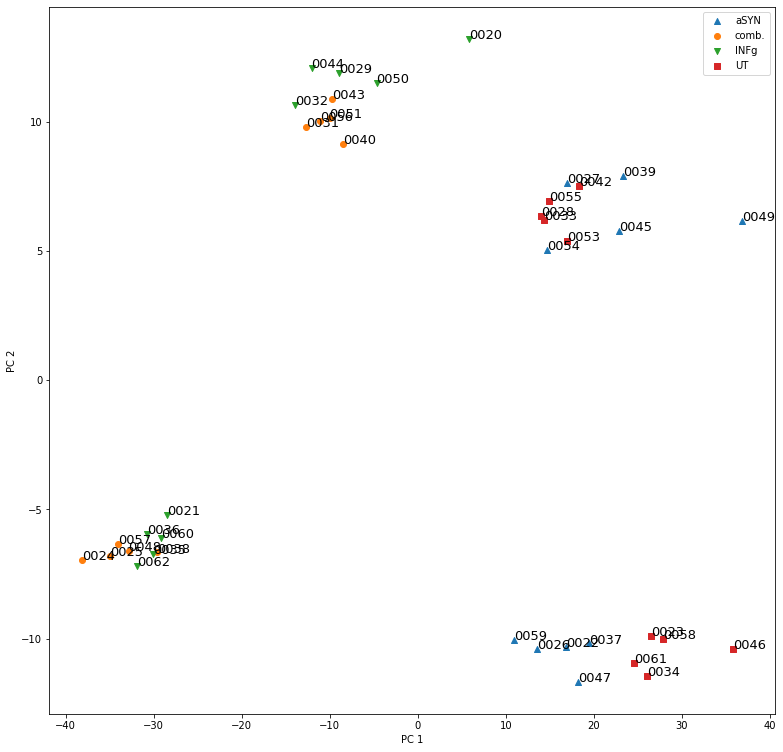

In [155]:
k=1
fig, ax = plt.subplots(figsize=(13,13))
ax.scatter(pca[:10,0],pca[:10,k], marker='^')#, c='red')
ax.scatter(pca[10:20,0],pca[10:20,k], marker='o')#, c='blue')
ax.scatter(pca[20:30,0],pca[20:30,k], marker='v')#, c='green')
ax.scatter(pca[30:,0],pca[30:,k], marker='s')#, c='magenta')
ax.legend(['aSYN','comb.','INFg','UT'])

for i, txt in enumerate(ID):
    ax.annotate(txt, (pca[i,0], pca[i,k]),fontsize=13)
plt.xlabel('PC 1')
plt.ylabel('PC {}'.format(k+1))
plt.show()
#plt.savefig('test.png')